# Natural Language Processing
## Final Report
### Simran Kaur 311443

### Importing Libraries

In [4]:
import os
from bs4 import BeautifulSoup
import random
from nltk.corpus import wordnet as wn
from scipy import spatial
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Semcor3.0 dataset

In [2]:
def semcordataset():   
    """
    This function reads the semcor datset and randomly collect 5000 tags from the tagfiles and return it.
    """
    main_path = "./semcor3.0/semcor3.0"
    list_tags = []
    directory = os.listdir(main_path)
    for file in directory:
        if os.path.isdir(main_path + '/' + file):
            ls_dir = os.listdir(main_path + '/' + file + '/tagfiles')
            for subdir in ls_dir:
                path = main_path + '/' + file + '/tagfiles/' + subdir
                with open(path, 'r') as fp:
                    soup = BeautifulSoup(fp)
                len_sent = soup.find_all('s')[-1]['snum']     # this gives number of sentences in one tagfile
                list_index = []
                for i in range(15):
                    n = random.randint(0, int(len_sent))           # random selection of 15 sentences from each of these
                                                                                 # tagfiles
                    while n in list_index:
                        n = random.randint(0, int(len_sent))         # to avoid selection of same sentence again
                    list_index.append(n)
                for idx in list_index:
                    list_tags.extend(soup.find_all('s', attrs = {"snum": idx}))
    return list_tags

In [3]:
data_semcor = semcordataset()

### senseval2.semcor dataset

In [82]:
def senseval2dataset():   
    """
    This function reads the senseval2 datset and selects all tags from the tagfiles and return it.
    """
    main_path = "./senseval2.semcor/senseval2.semcor/wordnet1.7.1/"
    list_tags = []
    directory = os.listdir(main_path)
    for file in directory:
        path = main_path + '/' + file
        with open(path, 'r') as fp:
            soup = BeautifulSoup(fp)
        len_sent = soup.find_all('s')[-1]['snum']     # this gives number of sentences in one tagfile
        for i in range(int(len_sent)):
            list_tags.extend(soup.find_all('s', attrs = {"snum": i}))
    return list_tags

In [83]:
data_senseval2 = senseval2dataset()

### senseval3.semcor dataset

In [84]:
def senseval3dataset():   
    """
    This function reads the senseval3 datset and selects all tags from the tagfiles and return it.
    """
    main_path = "./senseval3.semcor/senseval3.semcor/wordnet1.7.1/"
    list_tags = []
    directory = os.listdir(main_path)
    for file in directory:
        path = main_path + '/' + file
        with open(path, 'r') as fp:
            soup = BeautifulSoup(fp)
        len_sent = soup.find_all('s')[-1]['snum']     # this gives number of sentences in one tagfile
        for i in range(int(len_sent)):
            list_tags.extend(soup.find_all('s', attrs = {"snum": i}))
    return list_tags

In [85]:
data_senseval3 = senseval3dataset()

In [4]:
def mapping(tag):   
    """
    This function extracts the list of words from one tag at a time and returns the list of words in that sentence
    """
    words = []
    for word in tag.find_all('wf'):
        words.append(word.string)
    return words

#### The POS tagging in the datasets are different from the wordnet so a mapping is performed such that the POS tagging from the dataset maps to the one in wordnet.

In [5]:
wordnet_tags = {'n' : ['NN', 'NNP', 'NNPS', 'NNS', 'NP', 'NPS'],
               'v' : ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
               'a' : ['JJ', 'JJR', 'JJS'],
               'r' : ['RB', 'RBR', 'RBS', 'WRB']}

In [6]:
def w_synsets(sent, idx):  
    """
    This function takes in a sentence at a time, index of the word to return the 
    lemma, POS tag and synset number in order to compare with our prediction.
    """
    tag = sent.find_all('wf')[idx]
    if tag.has_attr("lemma") and tag["lemma"] != 'UNKNOWN':
        for key, lst_pos in wordnet_tags.items():
            if tag["pos"] in lst_pos:
                try:
                    wnsn = tag["wnsn"].split(';')[0].zfill(2)
                    return tag["lemma"] + '.' + key + '.' + wnsn
                except:
                    continue
            

### Baselines Method 

In [103]:
def Baseline(data, method): 
    """
    The baseline has two methods (1) Most Common Sense and Plain Lesk
    The input to the function is the data and a string method which tells the name of the model to use
    The output is the accuracy on the respective method
    """
    accuracy = 0
    count = 0
    for i, tag in enumerate(data):
        sent = mapping(tag)   
        # sent is the list of words in a sentence corresponding to a tag
        for idx, word in enumerate(sent):
            
            if method == 'PlainLesk':
                try:
                    list_synsets = wn.synsets(word)
                    max_intersection = 0
                    if len(list_synsets) > 1:    
                        # for ambiguous words
                        context_words = [w for w in sent if w != word]
                        scores = {}
                        for syn in list_synsets:
                            gloss = set(syn.definition().split() + ' '.join(syn.examples()).split(' '))
                            intersect_words = gloss.intersection(set(context_words))
                            scores[syn.name()] = len(intersect_words)
                        pred_synset = sorted(scores, key=scores.get, reverse=True)[0]
                        prediction = pred_synset.split('.')
                        try:
                            target = w_synsets(tag, idx).split('.')
                        except:
                            continue
                        if target is not None:
                            if target[1] == prediction[1] and target[2] == prediction[2]:
                                accuracy += 1
                            count += 1
                except:
                    continue

            if method == 'MostCommonSense':
                try:
                    syn = wn.synsets(word)[0]
                except:
                    continue
                target = w_synsets(tag, idx)
                if target is not None:
                    if syn.name() == target:
                        accuracy += 1
                    count += 1
                        
    return round((accuracy/count)*100, 2)      

### Testing Baselines on all datasets

#### Plain Lesk

In [97]:
print('Accuracy of Plain Lesk on Semcor dataset')
Baseline(data_semcor, 'PlainLesk')

Accuracy of Plain Lesk on Semcor dataset


32.05

In [98]:
print('Accuracy of Plain Lesk on Senseval2 dataset')
Baseline(data_senseval2, 'PlainLesk')

Accuracy of Plain Lesk on Senseval2 dataset


30.68

In [104]:
print('Accuracy of Plain Lesk on Senseval3 dataset')
Baseline(data_senseval3, 'PlainLesk')

Accuracy of Plain Lesk on Senseval3 dataset


29.86

#### Most Common Sense

In [105]:
print('Accuracy of Most Common Sense on Semcor dataset')
Baseline(data_semcor, 'MostCommonSense')

Accuracy of Most Common Sense on Semcor dataset


37.8

In [106]:
print('Accuracy of Most Common Sense on Senseval2 dataset')
Baseline(data_senseval2, 'MostCommonSense')

Accuracy of Most Common Sense on Senseval2 dataset


37.26

In [109]:
print('Accuracy of Most Common Sense on Senseval3 dataset')
Baseline(data_senseval3, 'MostCommonSense')

Accuracy of Most Common Sense on Senseval3 dataset


36.9

### Distributional Lesk

In [7]:
# Dictionary to store lexeme embeddings
lex_dic = {}       
with open("./embeddings/lexemes.txt", 'r') as lexemes:
    for i, line in enumerate(lexemes):
        if i != 0:
            lex = line.split(' ')[0]
            syn = lex.split('-')
            lex_dic[str(syn[0] + '.' + syn[-1] + '.' + syn[-2])] = [float(x) for x in line.split(' ')[1:]]

In [8]:
def lex_embedding(lemmas, pos, offset):
    """
    This function returne the lexeme embedding for a synset if it exist
    """
    for lemma in lemmas:
        syn = '.'.join([lemma, pos, offset])
        if syn in lex_dic.keys():
            return lex_dic[syn]
    return None

In [9]:
def gloss_embedding(syn, embedding, stopwords = False):
    """
    This function returns the gloss embedding for a synset by taking the average of embeddings of the gloss
    of that synset
    """
    glos_emb = None
    count = 0
    sense = set(syn.definition().strip().split(' '))
    for hyp in syn.hyponyms():
        sense.union(hyp.definition().strip().split(' '))
    
    if stopwords:
        sense = remove_stopwords(list(sense))
        
    if embedding == 'gensim':
        for w in sense:
            try:
                if glos_emb is None:
                    glos_emb = embd.get_vector(w)
                else:
                    glos_emb = glos_emb + embd.get_vector(w)
                count += 1
            except:
                continue
                
    if embedding == 'w2v':
        for w in sense:
            try:
                if glos_emb is None:
                    glos_emb = w2v_model.wv[w]
                else:
                    glos_emb = glos_emb + w2v_model.wv[w]
                count += 1
            except:
                continue
                
    if embedding == 'trained':
        for w in sense:
            try:
                if glos_emb is None:
                    glos_emb = w2v_model_improved.wv[w]
                else:
                    glos_emb = glos_emb + w2v_model_improved.wv[w]
                count += 1
            except:
                continue
                
    if embedding == 'Flair':
        sent = list(sense)
        sent = [x for x in sent if x != '']
        sent = Sentence(sent)
        stacked_embeddings.embed(sent)
        for token in sent:
            try:
                if glos_emb is None:
                    glos_emb = token.embedding.cpu().detach().numpy()
                else:
                    glos_emb = glos_emb + token.embedding.cpu().detach().numpy()
                count += 1
            except:
                continue
                
    if embedding == 'SBERT':
        sent = list(sense)
        glos_emb = model.encode(' '.join(sent))
        return glos_emb
        
    return None if glos_emb is None else [ele/count for ele in glos_emb]

In [10]:
def context_embedding(sentence, word, senses, embedding, stopwords = False):
    """
    This function returns the context embedding of the target word by averaging over the 
    embeddings of all context words
    """
    count = 0
    cont_emb = None
    sent = [w for w in sentence if w!= word]
    
    if stopwords:
        sent = remove_stopwords(sent)
        
    if embedding == 'gensim':
        for w in sent:
            emb_word = w
            if w in senses.keys():
                emb_word = senses[w].name().split('.')[0]
            try:
                if cont_emb is None:
                    cont_emb = embd.get_vector(emb_word)
                else:
                    cont_emb = cont_emb + embd.get_vector(emb_word)
                count += 1
            except:
                continue
                
    if embedding == 'w2v':
        for w in sent:
            emb_word = w
            if w in senses.keys():
                emb_word = senses[w].name().split('.')[0]
            try:
                if cont_emb is None:
                    cont_emb = w2v_model.wv[emb_word]
                else:
                    cont_emb = cont_emb + w2v_model.wv[emb_word]
                count += 1
            except:
                continue
                
    if embedding == 'trained':
        for w in sent:
            emb_word = w
            if w in senses.keys():
                emb_word = senses[w].name().split('.')[0]
            try:
                if cont_emb is None:
                    cont_emb = w2v_model_improved.wv[emb_word]
                else:
                    cont_emb = cont_emb + w2v_model_improved.wv[emb_word]
                count += 1
            except:
                continue
                
    if embedding == 'Flair':
        sent = [senses[w].name().split('.')[0] if w in senses.keys() else w for w in sent]
        sent = Sentence(sent)
        stacked_embeddings.embed(sent)
        for token in sent:
            try:
                if cont_emb is None:
                    cont_emb = token.embedding.cpu().detach().numpy()
                else:
                    cont_emb = cont_emb + token.embedding.cpu().detach().numpy()
                count += 1
            except:
                continue
                
    if embedding == 'SBERT':
        sent = [senses[w].name().split('.')[0] if w in senses.keys() else w for w in sent]
        cont_emb = model.encode(' '.join(sent))
        return cont_emb
    
    return None if cont_emb is None else [ele/count for ele in cont_emb]

In [11]:
def cosine_similarity(a, b):
    return 1 - spatial.distance.cosine(a, b)

In [12]:
def ground_truth(word, sent):
    word_syn = {}
    for i, w in enumerate(sent.find_all('wf')):
        if w_synsets(sent, i) is not None:
            word_syn[w.string] = w_synsets(sent, i)
        else:
            word_syn[w.string] = None
    return None if word_syn[word] is None else word_syn[word]

In [ ]:
## def distributional_lesk(data, embedding, stopwords = False):
    accuracy = 0
    count = 0
    for tag in data:
        sent = mapping(tag)
        sense_words = {}
        order_synsets = {}
        try:
            for word in sent:
                    order_synsets[word] = len(wn.synsets(word))
            ordered_sent = [w for w, l in sorted(order_synsets.items(), key = lambda item: item[1])]
            for word in ordered_sent:
                if len(wn.synsets(word)) > 1:
                    scores = []
                    for syn in wn.synsets(word):
                        Gs_Cw = 0
                        Lsw_Cw = 0
                        l_embd = lex_embedding(syn.lemma_names(), syn.pos(), str(syn.offset()))
                        g_embd = gloss_embedding(syn, embedding, stopwords)
                        c_embd = context_embedding(ordered_sent, word, sense_words, embedding, stopwords)

                        if embedding == 'gensim':
                            if l_embd is not None and c_embd is not None:
                                Lsw_Cw = cosine_similarity(l_embd, c_embd)

                        if embedding == 'w2v':
                            if l_embd is not None and c_embd is not None:
                                Lsw_Cw = cosine_similarity(l_embd, c_embd)

                        if embedding == 'trained':
                            if l_embd is not None and c_embd is not None:
                                Lsw_Cw = cosine_similarity(l_embd, c_embd)

                        if embedding == 'Flair':
                            cont_embd = context_embedding(ordered_sent, word, sense_words, embedding = 'gensim', stopwords = True)
                            if l_embd is not None and cont_embd is not None:
                                Lsw_Cw = cosine_similarity(l_embd, cont_embd)

                        if embedding == 'SBERT':
                            cont_embd = context_embedding(ordered_sent, word, sense_words, embedding = 'gensim', stopwords = True)
                            if l_embd is not None and cont_embd is not None:
                                Lsw_Cw = cosine_similarity(l_embd, cont_embd)

                        if g_embd is not None and c_embd is not None:
                            Gs_Cw = cosine_similarity(g_embd, c_embd)


                        scores.append(Gs_Cw + Lsw_Cw)
                    sense_words[word] = wn.synsets(word)[max((s,i) for i,s in enumerate(scores))[1]]
                    prediction = sense_words[word].name().split('.')
                    try:
                        target = ground_truth(word, tag).split('.')
                    except:
                        continue
                    if target is not None:
                        if target[1] == prediction[1] and target[2] == prediction[2]:
                            accuracy += 1
                        count += 1

        except:
            continue

    return round((accuracy/count)*100, 2) 
            

#### Distributional Lesk for the Gensim Embeddings 

In [14]:
import gensim.downloader
embd = gensim.downloader.load('word2vec-google-news-300')
embd.save('gensim_embedding.gensim')

In [121]:
print('Accuracy of Distributional Lesk on the Semcor dataset')
distributional_lesk(data_semcor, 'gensim', stopwords = False)

Accuracy of Distributional Lesk on the Semcor dataset


46.42

In [119]:
print('Accuracy of Distributional Lesk on the Senseval2 dataset')
distributional_lesk(data_senseval2, 'gensim', stopwords = False)

Accuracy of Distributional Lesk on the Senseval2 dataset


42.69

In [125]:
print('Accuracy of Distributional Lesk on the Senseval3 dataset')
distributional_lesk(data_senseval3, 'gensim', stopwords = False)

Accuracy of Distributional Lesk on the Senseval3 dataset


40.21

### Extensions

#### 1. Experiment with removing stopwords and punctuation from the dictionary glosses, sense descriptions and contexts in the occurrences of the words before measuring the distance.

In [15]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append("'s")

In [16]:
import string
punctuations = []
for ch in string.punctuation:
    punctuations.append(ch)

In [17]:
def remove_stopwords(sent):
    filtered_sent = []
    for word in sent:
        new_word = ''
        for ch in word:
            if ch not in punctuations:
                new_word += ch
        if new_word.lower() not in stop_words:
            filtered_sent.append(new_word)
    return filtered_sent

#### Distributional Lesk performance after removing stopwords using Gensim word embeddings

In [126]:
print('Accuracy of Distributional Lesk on the Semcor dataset')
distributional_lesk(data_semcor, 'gensim', stopwords = True)

Accuracy of Distributional Lesk on the Semcor dataset


46.27

In [127]:
print('Accuracy of Distributional Lesk on the Senseval2 dataset')
distributional_lesk(data_senseval2, 'gensim', stopwords = True)

Accuracy of Distributional Lesk on the Senseval2 dataset


43.88

In [128]:
print('Accuracy of Distributional Lesk on the Senseval3 dataset')
distributional_lesk(data_senseval3, 'gensim', stopwords = True)

Accuracy of Distributional Lesk on the Senseval3 dataset


40.96

#### 2. SemCor data come from the Brown corpus. The Brown corpus consists of texts from different text categories (see e.g. https://www1.essex.ac.uk/linguistics/external/clmt/w3c/corpus_ling/content/corpora/list/private/brown/brown.html). Evaluate the results for individual categories.


In [2]:
categories = {}
main_path = "./semcor3.0/semcor3.0"
list_tags = []
directory = os.listdir(main_path)
for file in directory:
    if os.path.isdir(main_path + '/' + file):
        ls_dir = os.listdir(main_path + '/' + file + '/tagfiles')
        for subdir in ls_dir:
            path = main_path + '/' + file + '/tagfiles/' + subdir
            with open(path, 'r') as fp:
                soup = BeautifulSoup(fp)
            if str(subdir)[:4] not in categories.keys():
                categories[str(subdir)[:4]] = [soup]
            else:
                categories[str(subdir)[:4]].append(soup)
cat = {'br-a':'PRESS_REPORTAGE','br-b':'PRESS_EDITORIAL', 'br-c':'PRESS_REVIEWS', 'br-d':'RELIGION', 
                'br-e':'SKILL_AND _HOBBIES', 'br-f':'POPULAR_LORE', 'br-g':'BELLES_LETTRES', 'br-h': 'MISCELLANEOUS',
                'br-j': 'LEARNED', 'br-k':'FICTION_GENERAL','br-l':'FICTION_MYSTERY', 'br-m':'FICTION_SCIENCE',
                'br-n':'FICTION_ADVENTURE', 'br-p':'FICTION_ROMANCE', 'br-r': 'HUMOR'}    
Text_categories = {cat[k]: v for k, v in categories.items()}

In [7]:
accuracy = {}
for category in Text_categories.keys():
    accuracy[category] = distributional_lesk(Text_categories[category], 'gensim', stopwords = True)

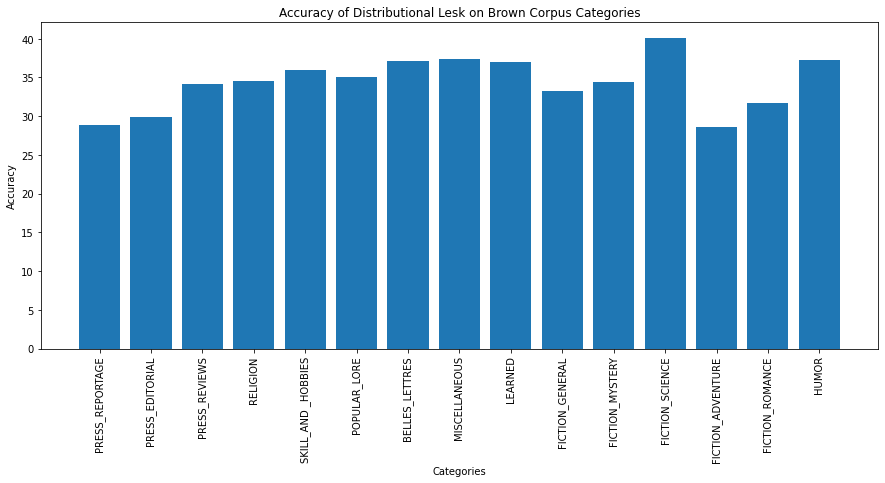

In [15]:
fig = plt.figure(figsize=(15,6))
Categories = Text_categories.keys()
accuracy_categories = accuracy.values()
plt.bar(Categories,accuracy_categories)
plt.title('Accuracy of Distributional Lesk on Brown Corpus Categories')
plt.xlabel('Categories')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

#### 3. Train your own word embeddings for this task, possibly initializing the embeddings with pre-trained embeddings.

In [129]:
import multiprocessing
cores = multiprocessing.cpu_count()

w2v_model = gensim.models.Word2Vec(min_count=5,
                                   window=3,
                                   vector_size=300,
                                   workers=cores,
                                   sg=1
                                   )

In [130]:
def TrainingDataset():
    """
    This function takes data from Semcor, Senseval2 and Senseval3 to train Word2Vec model
    """
    mergedTags = data_semcor + data_senseval2 + data_senseval3
    sentences = []
    for tags in mergedTags:
        sentences.append(mapping(tags))
    return sentences

#### Training Word2Vec

In [131]:
Tsentences = TrainingDataset()

In [132]:
w2v_model.build_vocab(Tsentences, progress_per=10000)
w2v_model.train(Tsentences, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)
w2v_model.init_sims(replace=True)

#### Distributional Lesk performance after removing stopwords using Trained word embeddings

In [133]:
print('Accuracy of Distributional Lesk on the Semcor dataset')
distributional_lesk(data_semcor, 'w2v', stopwords = True)

Accuracy of Distributional Lesk on the Semcor dataset


43.13

In [134]:
print('Accuracy of Distributional Lesk on the Senseval2 dataset')
distributional_lesk(data_senseval2, 'w2v', stopwords = True)

Accuracy of Distributional Lesk on the Senseval2 dataset


36.82

In [135]:
print('Accuracy of Distributional Lesk on the Senseval3 dataset')
distributional_lesk(data_senseval3, 'w2v', stopwords = True)

Accuracy of Distributional Lesk on the Senseval3 dataset


37.11

#### 4. Use several pre-trained embeddings or train embeddings with various parameter settings (you probably need to make big changes so you actually get significantly different results for WSD) and study the influence of the used embeddings on the disambiguation task.

In [136]:
w2v_model_improved = gensim.models.Word2Vec(min_count=2,
                                   window=8,
                                   vector_size=300,
                                   workers=cores,
                                   sg=1
                                   )

In [137]:
w2v_model_improved.build_vocab(Tsentences, progress_per=10000)
w2v_model_improved.train(Tsentences, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)
w2v_model_improved.init_sims(replace=True)

In [138]:
print('Accuracy of Distributional Lesk on the Semcor dataset')
distributional_lesk(data_semcor, 'trained', stopwords = True)

Accuracy of Distributional Lesk on the Semcor dataset


44.28

In [139]:
print('Accuracy of Distributional Lesk on the Senseval2 dataset')
distributional_lesk(data_senseval2, 'trained', stopwords = True)

Accuracy of Distributional Lesk on the Senseval2 dataset


36.37

In [140]:
print('Accuracy of Distributional Lesk on the Senseval3 dataset')
distributional_lesk(data_senseval3, 'trained', stopwords = True)

Accuracy of Distributional Lesk on the Senseval3 dataset


39.27

#### 5. Extend the word embedding model to also use character-based representations, e.g. fastText or flair embeddings

In [62]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings
from flair.data import Sentence
from flair.embeddings import StackedEmbeddings

In [63]:
stacked_embeddings = StackedEmbeddings([
                                        WordEmbeddings('./gensim_embedding.gensim'),
                                        FlairEmbeddings('news-forward'),
                                        FlairEmbeddings('news-backward'),
                                       ])

In [22]:
print('Accuracy of Distributional Lesk on the SemCor dataset')
distributional_lesk(data_semcor, 'Flair', stopwords = True)

Accuracy of Distributional Lesk on the SemCor dataset


47.42

In [23]:
print('Accuracy of Distributional Lesk on the Senseval2 dataset')
distributional_lesk(data_senseval2, 'Flair', stopwords = True)

Accuracy of Distributional Lesk on the Senseval2 dataset


44.69

In [24]:
print('Accuracy of Distributional Lesk on the Senseval3 dataset')
distributional_lesk(data_senseval3, 'Flair', stopwords = True)

Accuracy of Distributional Lesk on the Senseval3 dataset


41.21

#### 6. Use transformers and sentence embeddings to compare a sentence and a gloss. E.g. you could use the SBERT pre-trained models. Use a part of the data to fine tune the transformer and classification model.

In [45]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [21]:
print('Accuracy of Distributional Lesk on the SemCor dataset')
distributional_lesk(data_semcor, 'SBERT', stopwords = True)

Accuracy of Distributional Lesk on the SemCor dataset


48.72

In [25]:
print('Accuracy of Distributional Lesk on the Senseval2 dataset')
distributional_lesk(data_senseval2, 'SBERT', stopwords = True)

Accuracy of Distributional Lesk on the Senseval2 dataset


45.31

In [26]:
print('Accuracy of Distributional Lesk on the Senseval3 dataset')
distributional_lesk(data_senseval3, 'SBERT', stopwords = True)

Accuracy of Distributional Lesk on the Senseval3 dataset


42.55